# Practica 3: Histograma para generar vectores de caractersticas

### 1. Objetivos

El alumno:
* Aprendera a calcular el histograma global y local de la imagen
* Entendera como calcular la distancia de error entre dos histogramas

### 2. Introduccion


### 3. Desarrollo

In [1]:
import cv2
from skimage import util
from skimage import exposure
from skimage.filters import rank
from skimage import img_as_ubyte
from scipy import signal
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### A.1 Ecualizacion local

# Realizar la ecualizacion del histograma, de forma local en una ventana nxn
def local_hist_eq(im, n):
    grays = np.arange(256)        # Niveles de gris
    for 

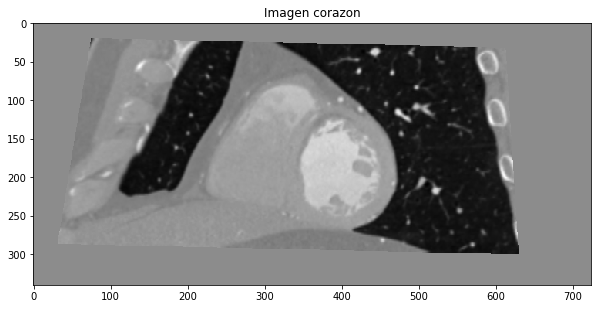

In [69]:
imgs = []

for i in range(1,11):
    imgs.append(cv2.imread('im_1_'+str(i)+'.png', 0))

plt.figure(figsize=(10,7))
plt.imshow(imgs[7], cmap='gray')
plt.title('Imagen corazon')
plt.show()

In [61]:
# Ecualizacion local de la imagen 
im_local_eq7 = rank.equalize(imgs[7], selem=np.ones((7,7)))
im_local_eq11 = rank.equalize(imgs[7], selem=np.ones((11,11)))

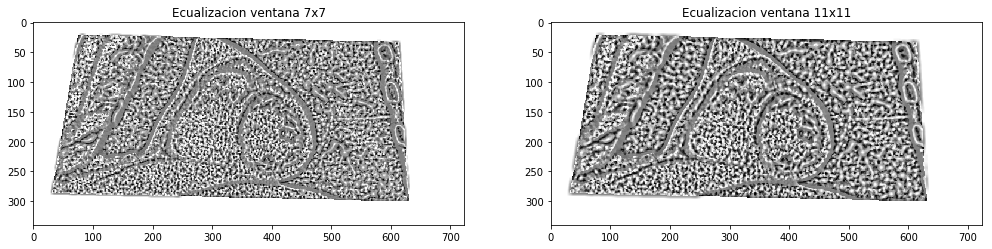

In [75]:
plt.figure(figsize=(17,12))
plt.subplot(121)
plt.imshow(im_local_eq7, cmap='gray')
plt.title('Ecualizacion ventana 7x7')
plt.subplot(122)
plt.imshow(im_local_eq11, cmap='gray')
plt.title('Ecualizacion ventana 11x11')
plt.show()

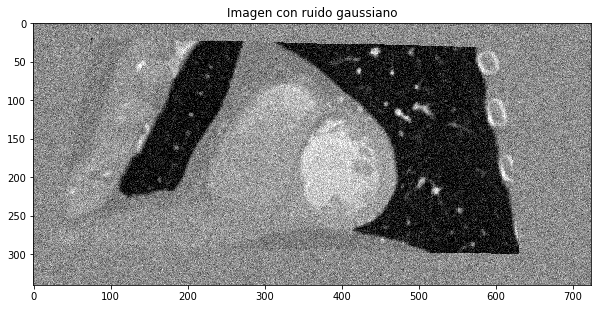

In [63]:
# Agregar ruido gaussiano a la imagen
im_noise = util.random_noise(imgs[7], mode='gaussian', var=0.01)

plt.figure(figsize=(10,10))
plt.imshow(im_noise, cmap='gray')
plt.title('Imagen con ruido gaussiano')
plt.show()

In [64]:
# Ecualizacion de las imagenes con ruido
im_nleq33 = rank.equalize(imgs[7], selem=np.ones((3,3)))
im_nleq55 = rank.equalize(imgs[7], selem=np.ones((15,15)))

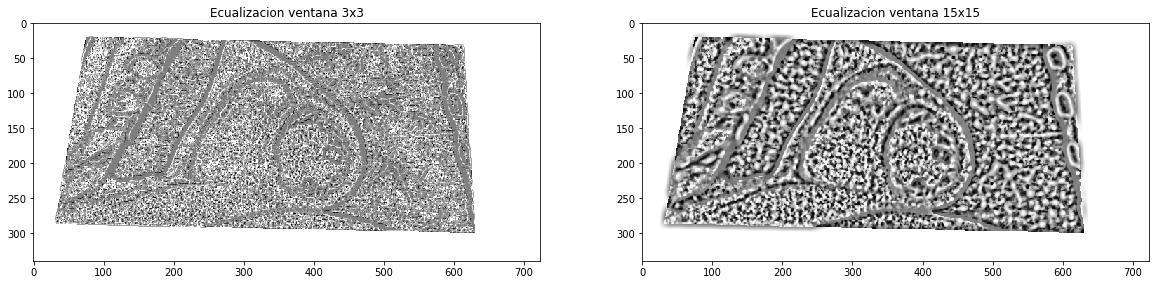

In [65]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(im_nleq33, cmap='gray')
plt.title('Ecualizacion ventana 3x3')
plt.subplot(122)
plt.imshow(im_nleq55, cmap='gray')
plt.title('Ecualizacion ventana 15x15')
plt.show()

### A.2 Distancia Chi-Square entre histogramas


In [76]:
# Convolucion de las imagenes con el filtro binomial 7x7
bin7 = np.array([1,6,15,20,15,6,1])                          
binKernel =  np.outer(bin7, bin7)       
binKernel = binKernel * (1/np.sum(binKernel)) 

imgs_binomial = []

for i in range(10):
    imgs_binomial.append(signal.convolve2d(imgs[i], binKernel, 'same'))

In [77]:
# Concatenacion de las imagenes filtradas
a1 = np.hstack((imgs_binomial[7], imgs_binomial[1]))
a2 = np.hstack((imgs_binomial[2], imgs_binomial[3]))
a3 = np.vstack((a1, a2))

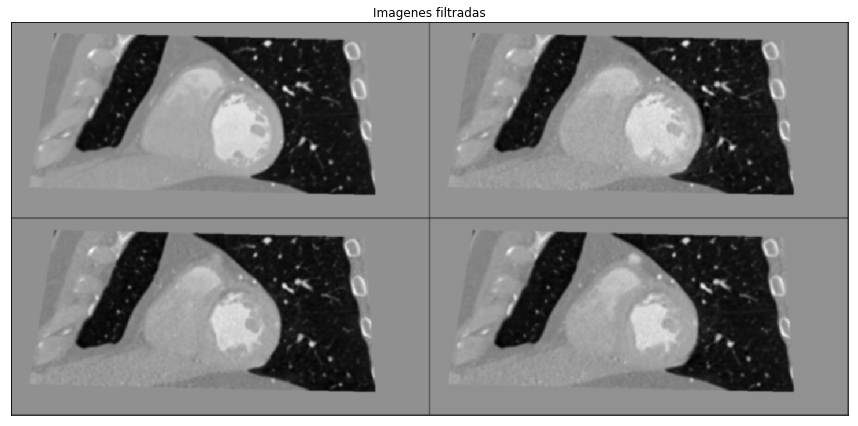

In [78]:
plt.figure(figsize=(15,10))
plt.imshow(a3, cmap='gray')
plt.title('Imagenes filtradas')
plt.xticks([])
plt.yticks([])
plt.show()

In [80]:
# Calculo de los histogramas

imgs_hist = []
imgs_bin_hist = []

for i in range(10):
    imgs_hist.append(exposure.histogram(imgs[i], nbins=256))
    imgs_bin_hist.append(exposure.histogram(imgs_binomial[i], nbins=256))

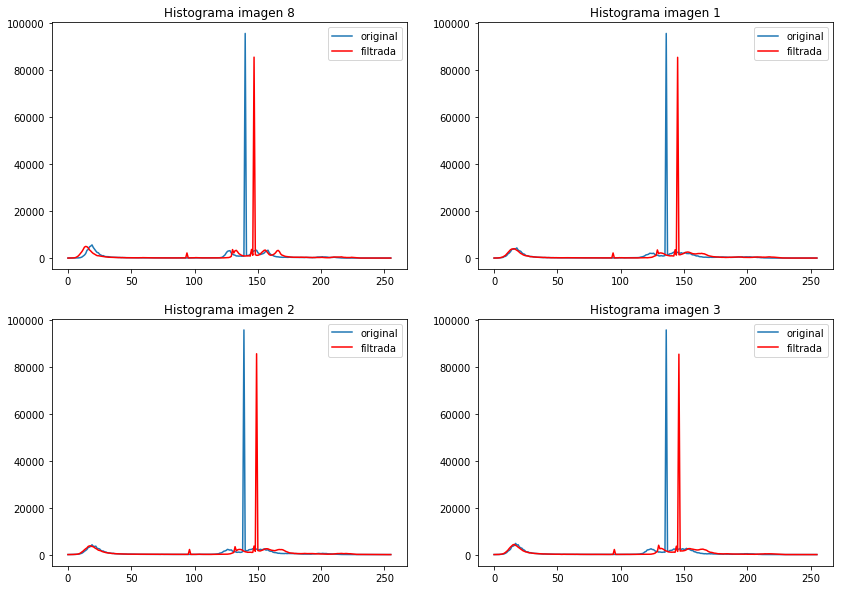

In [94]:
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(imgs_hist[7][0])
plt.plot(imgs_bin_hist[7][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 8')
plt.subplot(222)
plt.plot(imgs_hist[0][0])
plt.plot(imgs_bin_hist[0][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 1')
plt.subplot(223)
plt.plot(imgs_hist[1][0])
plt.plot(imgs_bin_hist[1][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 2')
plt.subplot(224)
plt.plot(imgs_hist[2][0])
plt.plot(imgs_bin_hist[2][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 3')
plt.show()

In [95]:
# Funcion que calcula la distancia chi-square entre dos histogramas
def chi_square(hist1, hist2):
    d = 0
    for n1, n2 in zip(hist1, hist2):
        d += np.square(n1-n2)
    return d

In [104]:
print('Distancia entre histogramas:\n')
print('Imagen 8')
print('original vs filtrada:', chi_square(imgs_hist[7][0], imgs_bin_hist[7][0]))
print('original vs original: ', chi_square(imgs_hist[7][0], imgs_hist[7][0]))
print('\nImagen 1')
print('original vs filtrada:', chi_square(imgs_hist[0][0], imgs_bin_hist[0][0]))
print('original vs original: ', chi_square(imgs_hist[0][0], imgs_hist[0][0]))
print('\nImagen 2')
print('original vs filtrada:', chi_square(imgs_hist[1][0], imgs_bin_hist[1][0]))
print('original vs original: ', chi_square(imgs_hist[1][0], imgs_hist[1][0]))
print('\nImagen 3')
print('original vs filtrada:', chi_square(imgs_hist[2][0], imgs_bin_hist[2][0]))
print('original vs original: ', chi_square(imgs_hist[2][0], imgs_hist[2][0]))

Distancia entre histogramas:

Imagen 8
original vs filtrada: 15915168348
original vs original:  0

Imagen 1
original vs filtrada: 15826446324
original vs original:  0

Imagen 2
original vs filtrada: 15883192296
original vs original:  0

Imagen 3
original vs filtrada: 15901074538
original vs original:  0


In [22]:
'''
https://scicomp.stackexchange.com/questions/5110/python-oss-alternatives-for-matlab-neural-network-toolbox-any-intercomparisons
https://scicomp.stackexchange.com/questions/22108/open-source-tool-comparable-to-matlab-neural-network-tool-box
http://deeplearning.net/software/pylearn2/
http://deeplearning.net/software/theano/

'''

'\nhttps://scicomp.stackexchange.com/questions/5110/python-oss-alternatives-for-matlab-neural-network-toolbox-any-intercomparisons\nhttps://scicomp.stackexchange.com/questions/22108/open-source-tool-comparable-to-matlab-neural-network-tool-box\nhttp://deeplearning.net/software/pylearn2/\nhttp://deeplearning.net/software/theano/\n\n'

### B.1 Reconocimiento mediante analisis del histograma

In [114]:
_, thresh1 = cv2.threshold(imgs[7],127,200,cv2.THRESH_BINARY)

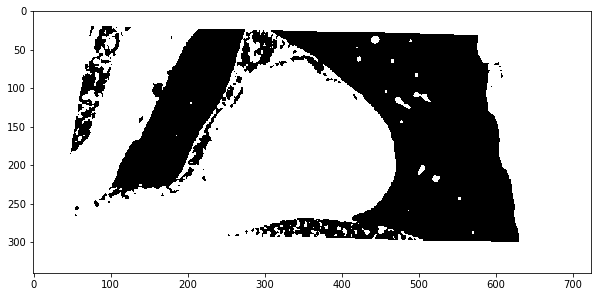

In [115]:
plt.figure(figsize=(10,10))
plt.imshow(thresh1, cmap='gray')
plt.show()